# importing librarires

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score      # evaluation metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_predict

In [3]:
#df=pd.read_table('parkinsons.data', sep=',')
df=pd.read_csv('pd_speech_features.csv')

In [4]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [6]:
df.shape

(756, 755)

In [7]:
df.drop('id',axis=1, inplace=True)

In [8]:
df.isna().sum()

gender                       0
PPE                          0
DFA                          0
RPDE                         0
numPulses                    0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 754, dtype: int64

In [9]:
df.duplicated().sum()

1

In [10]:
df=df.drop_duplicates()

In [11]:
#df.status.value_counts()
df['class'].value_counts()

1    563
0    192
Name: class, dtype: int64

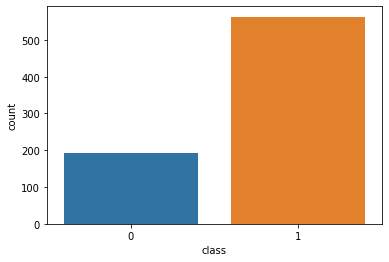

In [12]:
import seaborn as sns
sns.countplot(df['class'])

# Remvol of correlated feature

In [13]:
correlated_features = set()
correlation_matrix = df.drop('class', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [14]:
correlated_features


{'Ea2',
 'Ed2_10_coef',
 'Ed2_1_coef',
 'Ed2_2_coef',
 'Ed2_3_coef',
 'Ed2_4_coef',
 'Ed2_5_coef',
 'Ed2_6_coef',
 'Ed2_7_coef',
 'Ed2_8_coef',
 'Ed2_9_coef',
 'Ed_10_coef',
 'Ed_2_coef',
 'Ed_3_coef',
 'Ed_5_coef',
 'Ed_6_coef',
 'Ed_8_coef',
 'Ed_9_coef',
 'GNE_NSR_TKEO',
 'IMF_NSR_entropy',
 'VFER_entropy',
 'app_LT_TKEO_mean_10_coef',
 'app_LT_TKEO_mean_2_coef',
 'app_LT_TKEO_mean_3_coef',
 'app_LT_TKEO_mean_4_coef',
 'app_LT_TKEO_mean_5_coef',
 'app_LT_TKEO_mean_6_coef',
 'app_LT_TKEO_mean_7_coef',
 'app_LT_TKEO_mean_8_coef',
 'app_LT_TKEO_mean_9_coef',
 'app_LT_TKEO_std_10_coef',
 'app_LT_TKEO_std_1_coef',
 'app_LT_TKEO_std_2_coef',
 'app_LT_TKEO_std_3_coef',
 'app_LT_TKEO_std_4_coef',
 'app_LT_TKEO_std_5_coef',
 'app_LT_TKEO_std_6_coef',
 'app_LT_TKEO_std_7_coef',
 'app_LT_TKEO_std_8_coef',
 'app_LT_TKEO_std_9_coef',
 'app_LT_entropy_log_10_coef',
 'app_LT_entropy_log_1_coef',
 'app_LT_entropy_log_2_coef',
 'app_LT_entropy_log_3_coef',
 'app_LT_entropy_log_4_coef',
 'app_LT_entr

In [15]:
len(correlated_features)

472

In [16]:
df.drop(correlated_features, axis=1, inplace=True)


In [17]:
df.shape

(755, 282)

# Balancing the dataset

In [18]:
from sklearn.utils import resample

In [19]:
# Separate majority and minority classes
df_majority = df[df['class']==1]
df_minority = df[df['class']==0]
 

In [20]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=563,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled['class'].value_counts()

1    563
0    563
Name: class, dtype: int64

In [21]:
df_upsampled.isna().sum()

gender                       0
PPE                          0
DFA                          0
RPDE                         0
numPulses                    0
                            ..
tqwt_kurtosisValue_dec_26    0
tqwt_kurtosisValue_dec_27    0
tqwt_kurtosisValue_dec_28    0
tqwt_kurtosisValue_dec_30    0
class                        0
Length: 282, dtype: int64

In [22]:
X=df_upsampled.drop('class', axis=1)
X.values
y=df_upsampled['class'].values


In [23]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [24]:
# Split into train and test sets
random_seed=123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Feature Dimention Reduction by PCA or Is it a Classifier

In [25]:
from sklearn.decomposition import PCA

# Cross validation

In [26]:
from sklearn.model_selection import cross_val_score


# Random Forest Model_PCA

In [27]:
pca = PCA(n_components=8, random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape, X_test_pca.shape
X=X_test_pca
y=y_test

In [29]:
rf=RandomForestClassifier()


In [30]:
rf.fit(X_train_pca, y_train)
y_pred=rf.predict(X_test_pca)

y_pred = cross_val_predict(rf, X, y, cv=5)

In [31]:
np.random.seed(42)
cv_acc = cross_val_score(rf, X, y, cv=5, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc):.3f}%")

The cross-validated accuracy is: 0.840%


In [32]:
np.random.seed(42)
cv_precision = cross_val_score(rf, X, y, cv=5, scoring="precision")
print(f"The cross-validated precision is: {np.mean(cv_precision):.3f}")

The cross-validated precision is: 0.869


In [33]:
np.random.seed(42)
cv_recall = cross_val_score(rf, X, y, cv=5, scoring="recall")
print(f"The cross-validated recall is: {np.mean(cv_recall):.3f}")

The cross-validated recall is: 0.794


In [34]:
np.random.seed(42)
cv_f1 = cross_val_score(rf, X, y, cv=5, scoring="f1")
print(f"The cross-validated F1 score is: {np.mean(cv_f1):.3f}")

The cross-validated F1 score is: 0.828


In [35]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)

[[146  27]
 [ 34 131]]


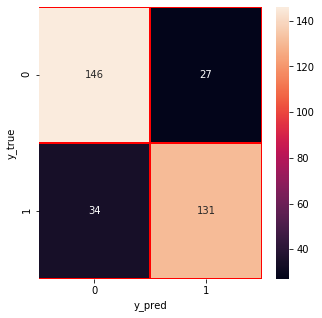

In [36]:
#confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.7,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# KNN-PCA

In [37]:
pca = PCA(n_components=8, random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [38]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape, X_test_pca.shape

((788, 8), (338, 8))

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)
knn_pred=cross_val_predict(rf, X, y, cv=5)

In [40]:
np.random.seed(42)
cv_acc = cross_val_score(knn, X, y, cv=5, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc):.3f}%")

The cross-validated accuracy is: 0.713%


In [41]:
np.random.seed(42)
cv_precision = cross_val_score(knn, X, y, cv=5, scoring="precision")
print(f"The cross-validated precision is: {np.mean(cv_precision):.3f}")

The cross-validated precision is: 0.730


In [42]:
np.random.seed(42)
cv_recall = cross_val_score(knn, X, y, cv=5, scoring="recall")
print(f"The cross-validated recall is: {np.mean(cv_recall):.3f}")

The cross-validated recall is: 0.667


In [43]:
np.random.seed(42)
cv_f1 = cross_val_score(knn, X, y, cv=5, scoring="f1")
print(f"The cross-validated F1 score is: {np.mean(cv_f1):.3f}")

The cross-validated F1 score is: 0.694


In [44]:
from sklearn.metrics import confusion_matrix
knn_pred_conf_mat = confusion_matrix(y, knn_pred)
print(knn_pred_conf_mat)

[[158  15]
 [ 35 130]]


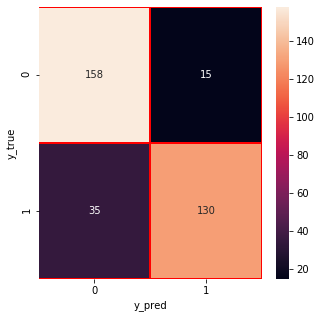

In [45]:
#confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(knn_pred_conf_mat,annot=True,linewidths=0.7,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

# PCA

In [47]:
from sklearn.decomposition import PCA

In [48]:
pca = PCA(n_components=8, random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [49]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape, X_test_pca.shape

((788, 8), (338, 8))

In [50]:
lr_pca= LogisticRegression()
lr_pca.fit(X_train_pca,y_train)
lr_pred=cross_val_predict(lr_pca, X, y, cv=5)

In [51]:
np.random.seed(42)
cv_acc = cross_val_score(lr_pca, X, y, cv=5, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc):.3f}%")

The cross-validated accuracy is: 0.793%


In [52]:
np.random.seed(42)
cv_precision = cross_val_score(lr_pca, X, y, cv=5, scoring="precision")
print(f"The cross-validated precision is: {np.mean(cv_precision):.3f}")

The cross-validated precision is: 0.801


In [53]:
np.random.seed(42)
cv_recall = cross_val_score(lr_pca, X, y, cv=5, scoring="recall")
print(f"The cross-validated recall is: {np.mean(cv_recall):.3f}")

The cross-validated recall is: 0.764


In [54]:
np.random.seed(42)
cv_f1 = cross_val_score(lr_pca, X, y, cv=5, scoring="f1")
print(f"The cross-validated F1 score is: {np.mean(cv_f1):.3f}")

The cross-validated F1 score is: 0.782


In [55]:
from sklearn.metrics import confusion_matrix
lr_pred_conf_mat = confusion_matrix(y, lr_pred)
print(lr_pred_conf_mat)

[[142  31]
 [ 39 126]]


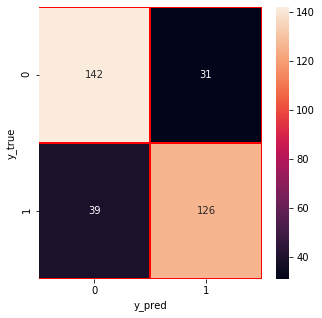

In [56]:
#confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(lr_pred_conf_mat,annot=True,linewidths=0.7,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Adaboost

In [57]:
from sklearn.ensemble import AdaBoostClassifier

# PCA

In [58]:
from sklearn.decomposition import PCA

In [59]:
pca = PCA(n_components=8, random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [60]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape, X_test_pca.shape

((788, 8), (338, 8))

In [61]:
adaboost_pca = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)


In [62]:

adaboost_pca.fit(X_train_pca, y_train)
adaboost_pca_pred=cross_val_predict(adaboost_pca, X, y, cv=5)

In [63]:
np.random.seed(42)
cv_acc = cross_val_score(knn, X, y, cv=5, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc):.3f}%")

The cross-validated accuracy is: 0.713%


In [64]:
np.random.seed(42)
cv_precision = cross_val_score(adaboost_pca, X, y, cv=5, scoring="precision")
print(f"The cross-validated precision is: {np.mean(cv_precision):.3f}")

The cross-validated precision is: 0.822


In [65]:
np.random.seed(42)
cv_recall = cross_val_score(adaboost_pca, X, y, cv=5, scoring="recall")
print(f"The cross-validated recall is: {np.mean(cv_recall):.3f}")

The cross-validated recall is: 0.794


In [66]:
np.random.seed(42)
cv_f1 = cross_val_score(adaboost_pca, X, y, cv=5, scoring="f1")
print(f"The cross-validated F1 score is: {np.mean(cv_f1):.3f}")

The cross-validated F1 score is: 0.806


In [67]:
from sklearn.metrics import confusion_matrix
adaboost_pca_pred_conf_mat = confusion_matrix(y, adaboost_pca_pred)
print(adaboost_pca_pred_conf_mat)

[[144  29]
 [ 34 131]]


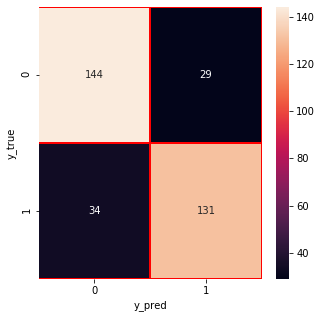

In [68]:
#confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(adaboost_pca_pred_conf_mat,annot=True,linewidths=0.7,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [69]:
# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(random_state=1234), 
               AdaBoostClassifier(n_estimators=50,
                         learning_rate=1), 
               KNeighborsClassifier(), 
               RandomForestClassifier(random_state=1234)]


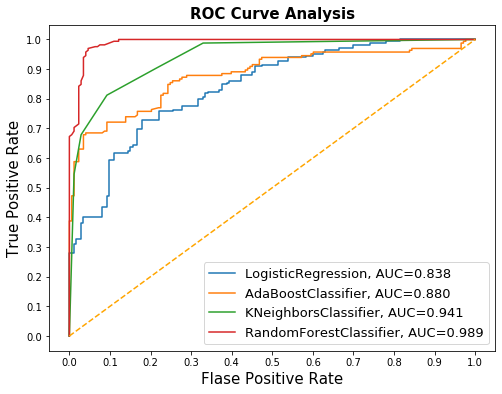

In [70]:
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_pca, y_train)
    yproba = model.predict_proba(X_test_pca)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)
#Plot the figure
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()